<a href="https://colab.research.google.com/github/SKANDHAN-13/CaP/blob/main/projecti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from google.colab import drive
drive.mount('/content/gdrive')
#Loading training, test dataset
df_train_raw = pd.read_csv('/content/gdrive/My Drive/ME6324/PM_train.txt', sep = ' ', header=None)
df_test_raw = pd.read_csv('/content/gdrive/My Drive/ME6324/PM_test.txt', sep = ' ', header=None)
df_truth_raw = pd.read_csv('/content/gdrive/My Drive/ME6324/PM_truth.txt', sep = ' ', header=None)
df_train_raw.head()





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [70]:
col_names =['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train_raw = df_train_raw.drop(df_train_raw.columns[[26,27]], axis=1)
df_train_raw.columns = col_names
df_test_raw = df_test_raw.drop(df_test_raw.columns[[26,27]], axis=1)
df_test_raw.columns = col_names
df_truth= df_truth_raw.drop(df_truth_raw.columns[[1]], axis=1)
df_truth.columns = ['rul']
df_truth.head()

rul
0  112
1   98
2   69
3   82
4   91

In [71]:
#Throttle settings of jet engine : Idle, Climb , Cruise
df = df_train_raw
print("Range for s1",df.s1.max()-df.s1.min(), "\t",df.s1[0],"\n")#Estimated cruising speed of the aircraft (in miles-per-hour)
print("Range for s2",df.s2.max()-df.s2.min(),"\t",df.s2[0],"\n")# Oil injection pressure(in kPa)
print("Range for s3",df.s3.max()-df.s3.min(),"\t",df.s3[0],"\n")#Turbine inlet temperature(in F)
print("Range for s4",df.s4.max()-df.s4.min(),"\t",df.s4.min(),"\n")#Air flow rate during takeoff(in kg/s)
print("Range for s5",df.s5.max()-df.s5.min(),"\t",df.s5[0],"\n")#Percentage available oxygen at cruising altitude

Range for s1 0.0 	 518.67 

Range for s2 3.3199999999999363 	 641.82 

Range for s3 45.87000000000012 	 1589.7 

Range for s4 59.24000000000001 	 1382.25 

Range for s5 0.0 	 14.62 



In [72]:
print("Range for s6",df.s6.max()-df.s6.min(), "\t",df.s6.min(),"\n")#Thrust force generated(in kN)
print("Range for s7",df.s7.max()-df.s7.min(),"\t",df.s7[0],"\n") #Cruising speed (in knots)
print("Range for s8",df.s8.max()-df.s8.min(),"\t",df.s8[0],"\n") #Inner combustion chamber wall temperature(in F)
print("Range for s9",df.s9.max()-df.s9.min(),"\t",df.s9[0],"\n")#Combustion Chamber Ignition temperature (in F)
print("Range for s10",df.s10.max()-df.s10.min(),"\t",df.s10[0],"\n") #Density of air at cruising altitude(in kg/m3)

Range for s6 0.00999999999999801 	 21.6 

Range for s7 6.209999999999923 	 554.36 

Range for s8 0.6599999999998545 	 2388.06 

Range for s9 222.86000000000058 	 9046.19 

Range for s10 0.0 	 1.3 



In [73]:

print("Range for s11",df.s11.max()-df.s11.min(),"\t",df.s11[0],"\n")#Propulsive power input(in kW)
print("Range for s12",df.s12.max()-df.s12.min(),"\t",df.s12[0],"\n")#Exhaust gas temperature(in F)
print("Range for s13",df.s13.max()-df.s13.min(),"\t",df.s13[0],"\n")#Outer combustion chamber wall temperature(in F)
print("Range for s14",df.s14.max()-df.s14.min(),"\t",df.s14[0],"\n")#Generator speed of turboprop(in rpm)
print("Range for s15",df.s15.max()-df.s15.min(), "\t",df.s15[0],"\n")#Pressure ratio of the engine

Range for s11 1.6799999999999997 	 47.47 

Range for s12 4.689999999999941 	 521.66 

Range for s13 0.6799999999998363 	 2388.02 

Range for s14 193.77999999999975 	 8138.62 

Range for s15 0.2599 	 8.4195 



In [74]:
print("Range for s16",df.s16.max()-df.s16.min(),"\t",df.s16.min(),"\n")#Humidity at cruising altitude
print("Range for s17",df.s17.max()-df.s17.min(),"\t",df.s17.min(),"\n")#Lift of the engine (in kN)
print("Range for s18",df.s18.max()-df.s18.min(),"\t",df.s18.min(),"\n")#Estimated combustion chamber temperature
print("Range for s19",df.s19.max()-df.s19.min(),"\t",df.s19.min(),"\n")#Engine model no.
print("Range for s20",df.s20.max()-df.s20.min(),"\t",df.s20.min(),"\n")#Fuel level at takeoff in m^3
print("Range for s21",df.s21.max()-df.s21.min(),"\t",df.s21.min(),"\n")#Fuel level at landing in m^3

Range for s16 0.0 	 0.03 

Range for s17 12 	 388 

Range for s18 0 	 2388 

Range for s19 0.0 	 100.0 

Range for s20 1.2899999999999991 	 38.14 

Range for s21 0.7241999999999997 	 22.8942 



In [75]:
plt.style.use('ggplot')

#%matplotlib inline
df.describe()

id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

             s1            s2            s3            s4            s5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

                s12           s13           s14           s15           s16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

                s17      s18      s19           s20           s21  
count  20631.000000  20631.0  20631.0  20631.000000  20631.000000  
mean     393.210654   2388.0    100.0     38.816271     23.289705  
std        1.548763      0.0      0.0      0.180746      0.108251  
min      388.000000   2388.0    100.0     38.140000     22.894200  
25%      392.000000   2388.0    100.0     38.700000     23.221800  
50%      393.000000   2388.0    100.0     38.830000     23.297900  
75%      394.000000   2388.0    100.0     38.950000     23.366800  
max      400.000000   2388.0    100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [76]:
#Checking the presence of null values in df dataset

df.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

It's a clean dataset with numeric data values & doesn't have any missing data.

Adding rolling average and rolling standard deviation for each of the sensor reading incorporating a fixed window size.

In [77]:
def add_features(df_in, rolling_win_size):

    """
    Args:
            df_in (dataframe)     : The input dataframe to be processed
            rolling_win_size (int): The window size (Number of cycles) for applying the rolling function
    Return:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    """
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]

    df_out = pd.DataFrame()
    ws = rolling_win_size

    #Calculate rolling stats for each engine id

    for m_id in pd.unique(df_in.id):

        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols

        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols

        # concatenate the new columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)

        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])

    return df_out

In [78]:
df_train_fx = add_features(df, 5)
df_train_fx.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      sd12      sd13      sd14      sd15  sd16      sd17  sd18  \
0  14.62  ...  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0   
1  14.62  ...  0.438406  0.035355  5.041671  0.008697   0.0  0.000000   0.0   
2  14.62  ...  0.404475  0.026458  3.717450  0.007640   0.0  1.154701   0.0   
3  14.62  ...  0.495950  0.029439  3.050906  0.028117   0.0  1.000000   0.0   
4  14.62  ...  0.432574  0.025884  2.651326  0.025953   0.0  1.095445   0.0   

   sd19      sd20      sd21  
0   0.0  0.000000  0.000000  
1   0.0  0.042426  0.003253  
2   0.0  0.055076  0.044573  
3   0.0  0.076322  0.037977  
4   0.0  0.073621  0.033498  

[5 rows x 68 columns]

Being similar to training data, the file contains the vitals of 100 engines. But this time, failure cycle is not mentioned.

In [79]:
df_test_raw.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

In [80]:
def prepare_train_data (df_in, period):

    """
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for Time-To-Fail segmentation. Used to derive classification labels

      Return:
          dataframe: The input dataframe with regression and classification labels added

    """

    #create regression label
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']

    #add remaining useful life as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['rul'] =(df_in['last_cycle'].astype(int) - df_in['cycle'].astype(int))
    df_in.drop(['last_cycle'], axis=1, inplace=True)

    #create binary classification label
    df_in['label_bnc'] = df_in['rul'].apply(lambda x: 1 if x <= period else 0)

    #create multi-class classification label
    df_in['label_mcc'] = df_in['rul'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_in

We have added the following labels to the data:

        * Regression Label: Remaining useful life (RuL) = Each cycle number for an engine subtracted from the final cycle number of the same engine.
        
        * Binary classification Label: bin_label = if RuL is <= parameter period then 1 else 0 (values = 0,1).

        * Multi-class classification Label: mcc = 2 if RuL <= 0.5* parameter period , 1 if RuL<= parameter period, else 2


In [81]:
df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  rul  \
0  14.62  ...  0.000000   0.0  0.000000   0.0   0.0  0.000000  0.000000  191   
1  14.62  ...  0.008697   0.0  0.000000   0.0   0.0  0.042426  0.003253  190   
2  14.62  ...  0.007640   0.0  1.154701   0.0   0.0  0.055076  0.044573  189   
3  14.62  ...  0.028117   0.0  1.000000   0.0   0.0  0.076322  0.037977  188   
4  14.62  ...  0.025953   0.0  1.095445   0.0   0.0  0.073621  0.033498  187   

   label_bnc  label_mcc  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 71 columns]

In [82]:
df_tr_lbl = df_train
df_tr_lbl[df_tr_lbl["label_bnc"]==1]

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
161      1    162   -0.0005    0.0004     100.0  518.67  643.15  1592.22   
162      1    163    0.0003   -0.0004     100.0  518.67  642.85  1600.54   
163      1    164    0.0005   -0.0002     100.0  518.67  643.17  1598.96   
164      1    165    0.0010    0.0004     100.0  518.67  642.76  1597.03   
165      1    166   -0.0022   -0.0003     100.0  518.67  643.34  1596.72   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...      sd15  sd16      sd17  sd18  sd19      sd20  \
161    1423.48  14.62  ...  0.027500   0.0  0.894427   0.0   0.0  0.107610   
162    1421.09  14.62  ...  0.036302   0.0  1.095445   0.0   0.0  0.103827   
163    1416.76  14.62  ...  0.033013   0.0  1.095445   0.0   0.0  0.093167   
164    1408.09  14.62  ...  0.027855   0.0  0.547723   0.0   0.0  0.072457   
165    1422.37  14.62  ...  0.018133   0.0  0.836660   0.0   0.0  0.074632   
...        ...    ...  ...       ...   ...       ...   ...   ...       ...   
20626  1428.63  14.62  ...  0.027684   0.0  1.643168   0.0   0.0  0.163003   
20627  1433.58  14.62  ...  0.022507   0.0  1.516575   0.0   0.0  0.142583   
20628  1428.18  14.62  ...  0.028242   0.0  1.816590   0.0   0.0  0.137113   
20629  1426.53  14.62  ...  0.028081   0.0  1.643168   0.0   0.0  0.138094   
20630  1432.14  14.62  ...  0.028252   0.0  1.303840   0.0   0.0  0.087006   

           sd21  rul  label_bnc  label_mcc  
161    0.058820   30          1          1  
162    0.072531   29          1          1  
163    0.073343   28          1          1  
164    0.062107   27          1          1  
165    0.029463   26          1          1  
...         ...  ...        ...        ...  
20626  0.086540    4          1          2  
20627  0.093479    3          1          2  
20628  0.116735    2          1          2  
20629  0.112731    1          1          2  
20630  0.087645    0          1          2  

[3100 rows x 71 columns]

<Axes: title={'center': 'Features Standard Deviation'}>

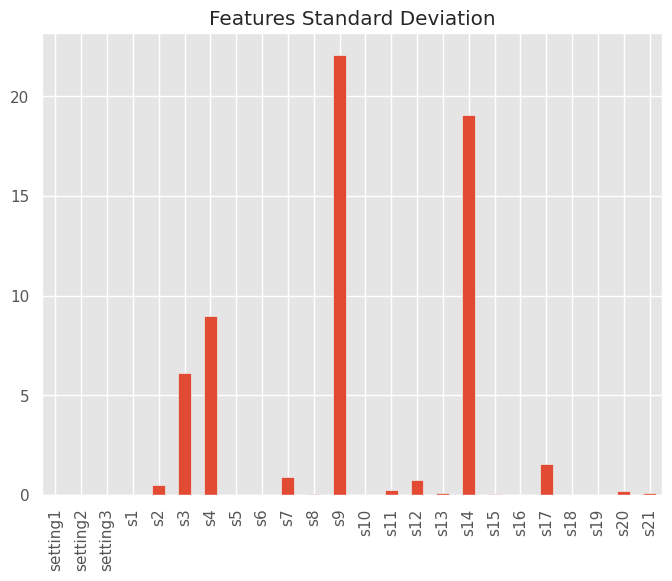

In [83]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

Ordered list of top variance features


In [84]:
featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
dtype: float64

In [85]:
df_tr_lbl[featurs].corrwith(df_tr_lbl.rul).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -3.969701e-16
s5         -3.969701e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [86]:
#Based on the above analysis, we segregate low correlation factors
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

setting3        s1      s10      s18      s19           s16  \
count   20631.0  20631.00  20631.0  20631.0  20631.0  2.063100e+04   
mean      100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
std         0.0      0.00      0.0      0.0      0.0  1.387812e-17   
min       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
25%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
50%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
75%       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   
max       100.0    518.67      1.3   2388.0    100.0  3.000000e-02   

                 s5      setting2      setting1  
count  2.063100e+04  20631.000000  20631.000000  
mean   1.462000e+01      0.000002     -0.000009  
std    1.776400e-15      0.000293      0.002187  
min    1.462000e+01     -0.000600     -0.008700  
25%    1.462000e+01     -0.000200     -0.001500  
50%    1.462000e+01      0.000000      0.000000  
75%    1.462000e+01      0.000300      0.001500  
max    1.462000e+01      0.000600      0.008700

In [87]:
#Similarly, we analyse features having high correlation
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
df_tr_lbl[correl_featurs].describe()

s12            s7           s21           s20            s6  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     521.413470    553.367711     23.289705     38.816271     21.609803   
std        0.737553      0.885092      0.108251      0.180746      0.001389   
min      518.690000    549.850000     22.894200     38.140000     21.600000   
25%      520.960000    552.810000     23.221800     38.700000     21.610000   
50%      521.480000    553.440000     23.297900     38.830000     21.610000   
75%      521.950000    554.010000     23.366800     38.950000     21.610000   
max      523.380000    556.060000     23.618400     39.430000     21.610000   

                s14            s9           s13            s8            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    8143.752722   9065.242941   2388.096152   2388.096652   1590.523119   
std       19.076176     22.082880      0.071919      0.070985      6.131150   
min     8099.940000   9021.730000   2387.880000   2387.900000   1571.040000   
25%     8133.245000   9053.100000   2388.040000   2388.050000   1586.260000   
50%     8140.540000   9060.660000   2388.090000   2388.090000   1590.100000   
75%     8148.310000   9069.420000   2388.140000   2388.140000   1594.380000   
max     8293.720000   9244.590000   2388.560000   2388.560000   1616.910000   

                s17            s2           s15            s4           s11  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean     393.210654    642.680934      8.442146   1408.933782     47.541168  
std        1.548763      0.500053      0.037505      9.000605      0.267087  
min      388.000000    641.210000      8.324900   1382.250000     46.850000  
25%      392.000000    642.325000      8.414900   1402.360000     47.350000  
50%      393.000000    642.640000      8.438900   1408.040000     47.510000  
75%      394.000000    643.000000      8.465600   1414.555000     47.700000  
max      400.000000    644.530000      8.584800   1441.490000     48.530000

In [88]:
# Add the regression label 'rul' to the list of high correlation features

correl_featurs_lbl = correl_featurs + ['rul']

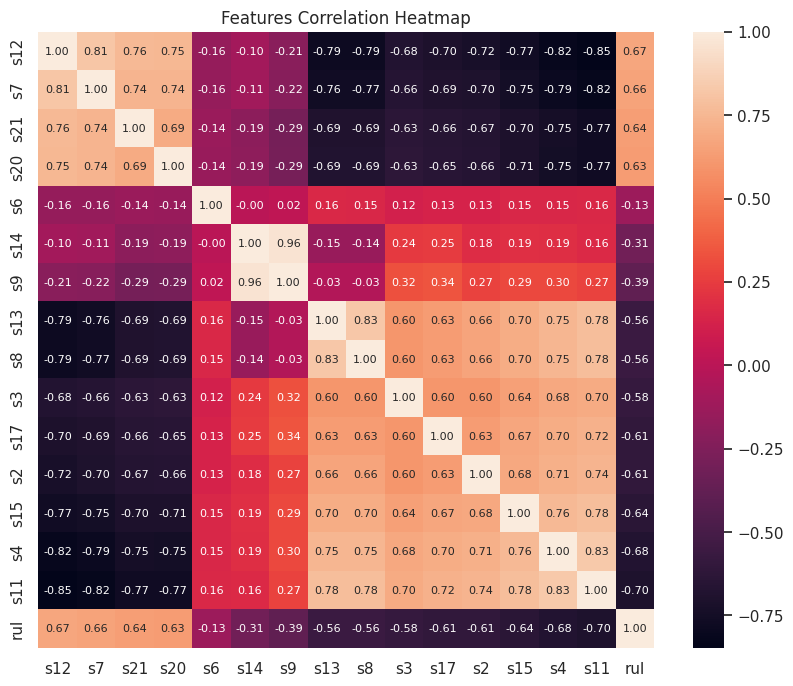

In [89]:
# Plot heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

array([[<Axes: xlabel='s12', ylabel='s12'>,
        <Axes: xlabel='s7', ylabel='s12'>,
        <Axes: xlabel='s21', ylabel='s12'>,
        <Axes: xlabel='s20', ylabel='s12'>,
        <Axes: xlabel='s6', ylabel='s12'>,
        <Axes: xlabel='s14', ylabel='s12'>,
        <Axes: xlabel='s9', ylabel='s12'>,
        <Axes: xlabel='s13', ylabel='s12'>,
        <Axes: xlabel='s8', ylabel='s12'>,
        <Axes: xlabel='s3', ylabel='s12'>,
        <Axes: xlabel='s17', ylabel='s12'>,
        <Axes: xlabel='s2', ylabel='s12'>,
        <Axes: xlabel='s15', ylabel='s12'>,
        <Axes: xlabel='s4', ylabel='s12'>,
        <Axes: xlabel='s11', ylabel='s12'>,
        <Axes: xlabel='rul', ylabel='s12'>],
       [<Axes: xlabel='s12', ylabel='s7'>,
        <Axes: xlabel='s7', ylabel='s7'>,
        <Axes: xlabel='s21', ylabel='s7'>,
        <Axes: xlabel='s20', ylabel='s7'>,
        <Axes: xlabel='s6', ylabel='s7'>,
        <Axes: xlabel='s14', ylabel='s7'>,
        <Axes: xlabel='s9', ylabel='s7'>,
    

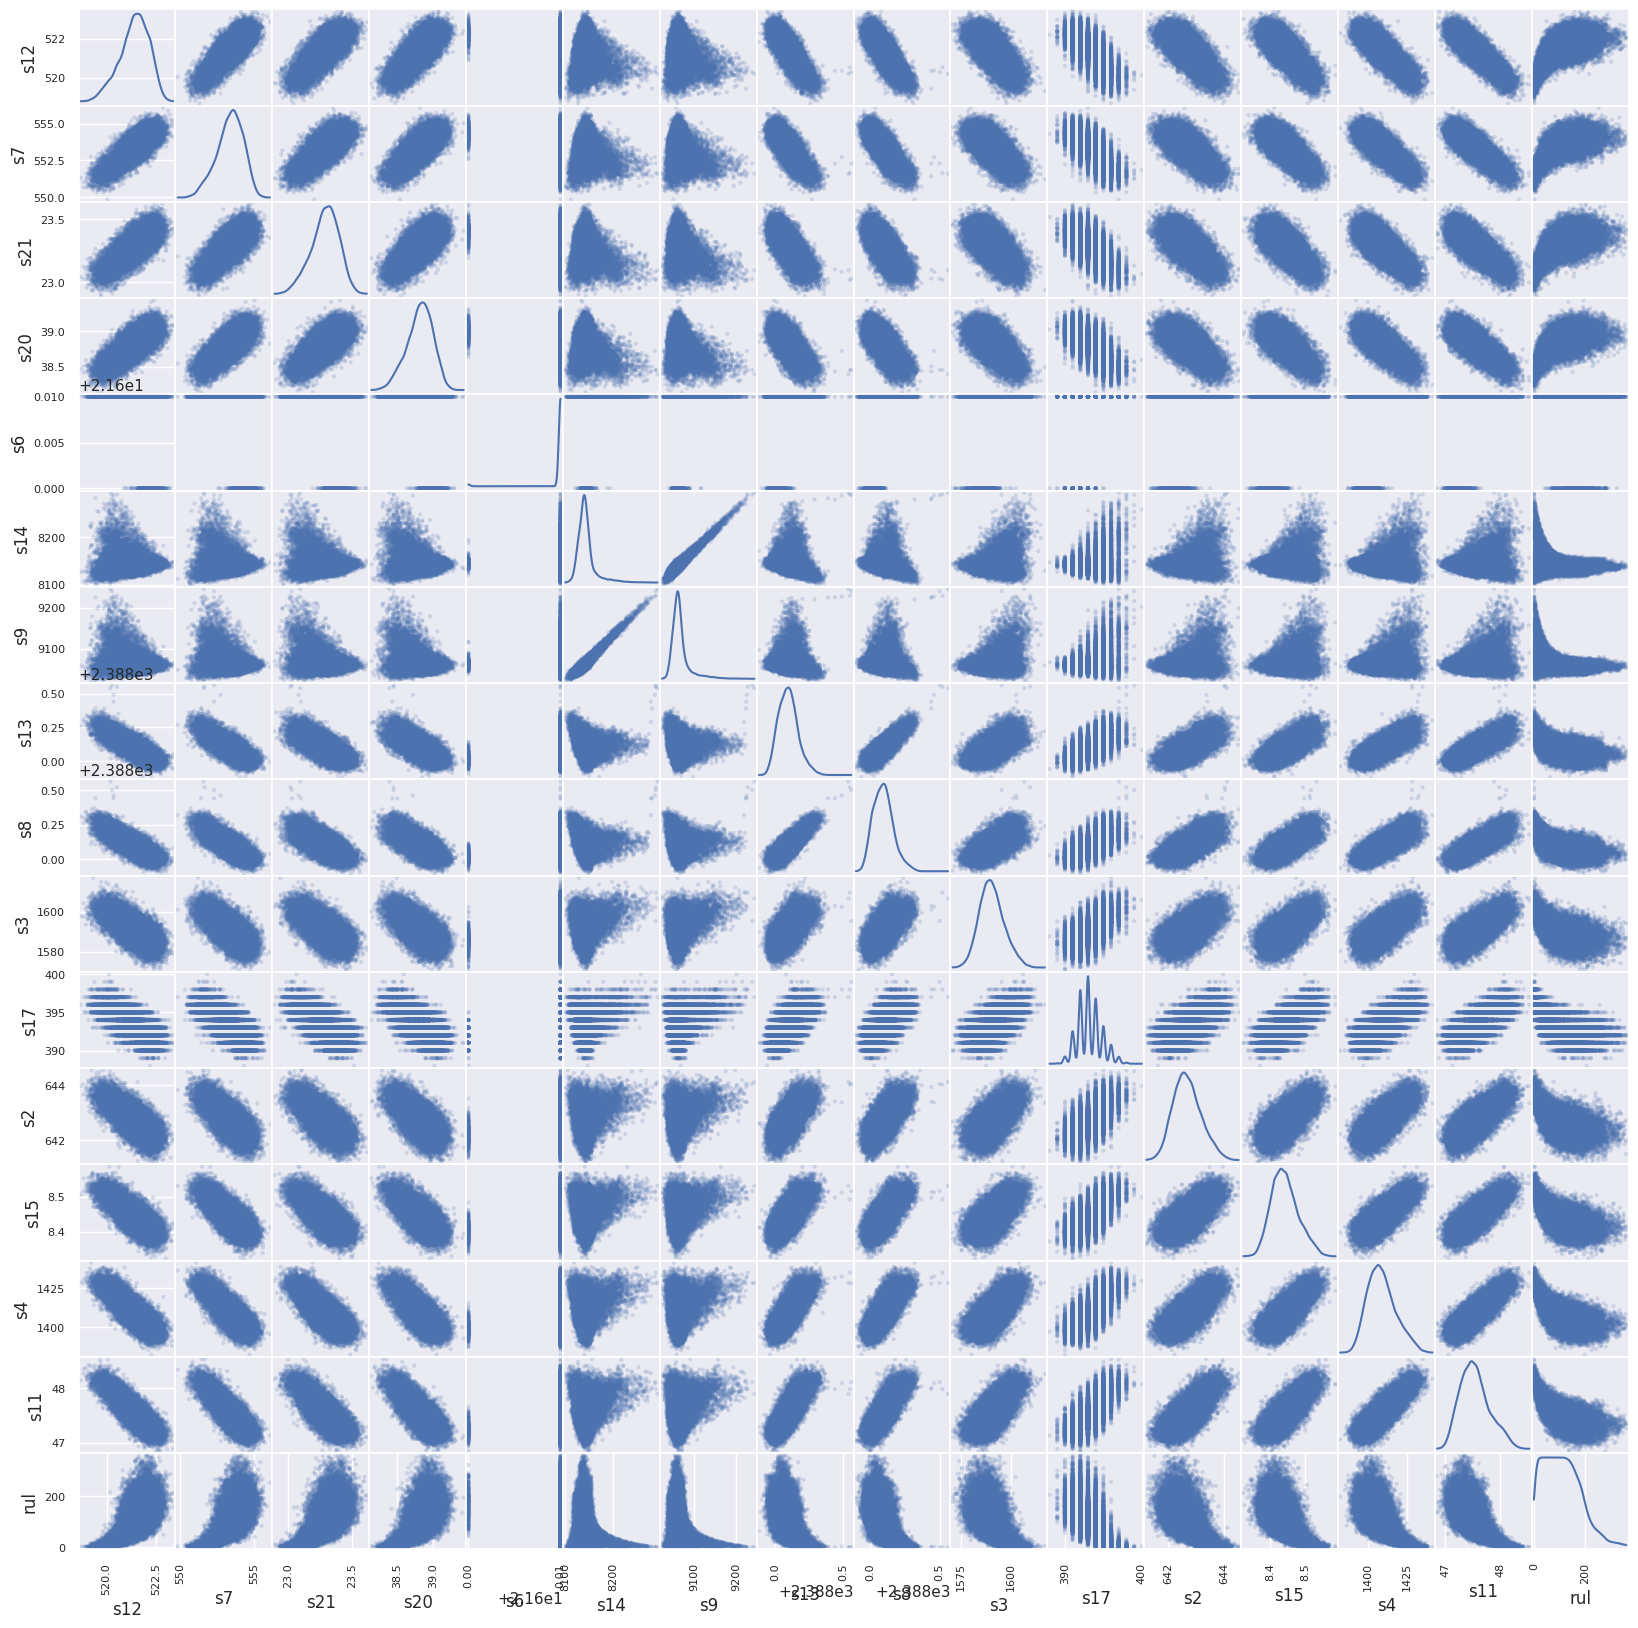

In [90]:
import pandas
pandas.plotting.scatter_matrix(df_tr_lbl[correl_featurs_lbl], alpha=0.2, figsize=(20, 20), diagonal='kde')

***Summary of analysis:***

* There is a very high correlation (> 0.8) between some feature pairs, such as : (s14 & s9), (s11 & s4), (s11 & s7) & (s11 & s12).So, part of these features shall be dealt with care, during the modeling phase.

* Most features exhibit normal distribution which is likely improves models performance.

In [91]:
def prepare_test_data(df_test_in, df_truth_in, period):

    """
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for RUL segmentation. Used to derive classification labels

      Return:
          dataframe: The input dataframe with regression and classification labels added
    """

    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())

    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']

    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)

    df_test_in.reset_index(drop=True, inplace=True)

    df_test_in = pd.concat([df_test_in, df_truth], axis=1)

    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['rul'].apply(lambda x: 1 if x <= period else 0)

    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['rul'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

In [92]:
df_test_fx = add_features(df_test_raw, 5)
df_test_fx.head()


id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...      sd12      sd13      sd14      sd15  sd16      sd17  sd18  \
0  14.62  ...  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0   
1  14.62  ...  0.311127  0.021213  9.948992  0.017607   0.0  0.707107   0.0   
2  14.62  ...  0.220681  0.017321  7.179807  0.032155   0.0  0.577350   0.0   
3  14.62  ...  0.337182  0.015000  5.890096  0.027781   0.0  0.957427   0.0   
4  14.62  ...  0.329742  0.014142  5.222300  0.024080   0.0  1.303840   0.0   

   sd19      sd20      sd21  
0   0.0  0.000000  0.000000  
1   0.0  0.113137  0.012799  
2   0.0  0.113725  0.021642  
3   0.0  0.093095  0.020353  
4   0.0  0.080623  0.020672  

[5 rows x 68 columns]

In [93]:
df_test = prepare_test_data(df_test_fx, df_truth, 30)
df_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  rul  \
0  14.62  ...  0.021174   0.0  0.707107   0.0   0.0  0.124016  0.025037  112   
1  14.62  ...  0.011429   0.0  1.095445   0.0   0.0  0.069785  0.027820   98   
2  14.62  ...  0.030924   0.0  0.836660   0.0   0.0  0.143631  0.018966   69   
3  14.62  ...  0.021249   0.0  1.341641   0.0   0.0  0.126372  0.021106   82   
4  14.62  ...  0.009627   0.0  0.547723   0.0   0.0  0.091924  0.101100   91   

   label_bnc  label_mcc  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 71 columns]

In [94]:
df_test.dtypes

id             int64
cycle          int64
setting1     float64
setting2     float64
setting3     float64
              ...   
sd20         float64
sd21         float64
rul            int64
label_bnc      int64
label_mcc      int64
Length: 71, dtype: object

In [95]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, RFECV

*Regression Modelling:*

We segment the training and test data into features dataframe and labels series.

In [96]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
                 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7',
                 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21',
                 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15',
                 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# a variable to hold the set of features to experiment with
features = features_orig


X_train = df_train[features]
y_train = df_train['rul']

X_test = df_test[features]
y_test = df_test['rul']

Defining a function to get metrics for various regression models.

In [97]:
def get_regression_metrics(model, actual, predicted):

    """
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values

    Return:
        dataframe: The combined metrics in single dataframe


    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

Plotting Regression coefficient Weights or Feature importance.

In [98]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):

    """
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'

    Return:
        plot of either regression coefficients weights or feature importance
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='b', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


Displaying the regression residuals.

In [99]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):

    """
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data

    Return:
        Plot of regression residuals

    """

    plt.scatter(y_train_pred, y_train_pred - y_train, c='red', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [100]:
#Linear regression

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


Linear Regression
Root Mean Squared Error          32.041095
Mean Absolute Error              25.591780
R^2                               0.405495
Explained Variance                0.665297

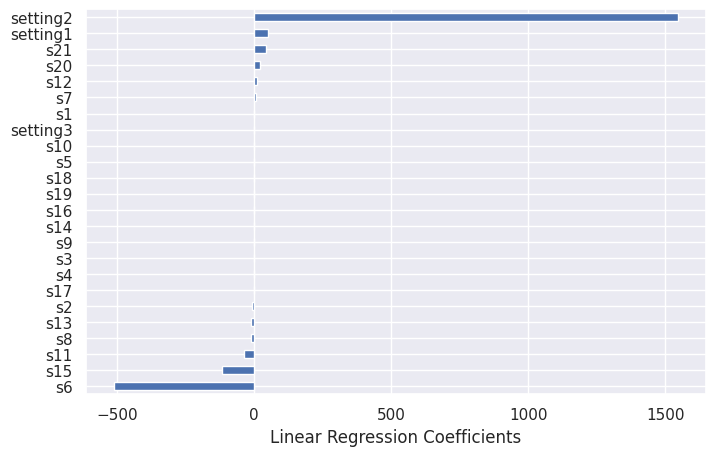

In [101]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

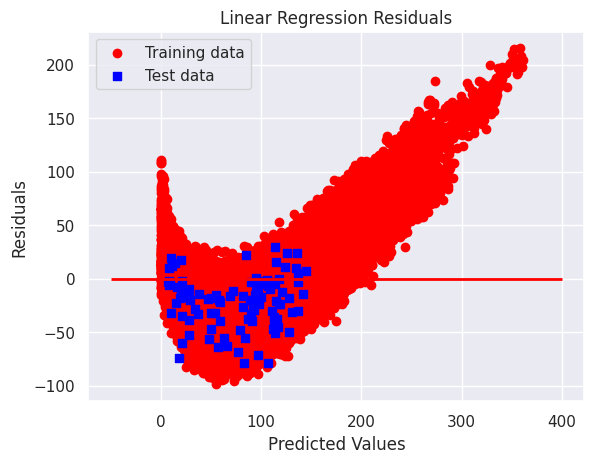

In [102]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [103]:
#LASSO

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.579, R^2 test: 0.408


LASSO
Root Mean Squared Error  31.966099
Mean Absolute Error      25.551808
R^2                       0.408275
Explained Variance        0.668206

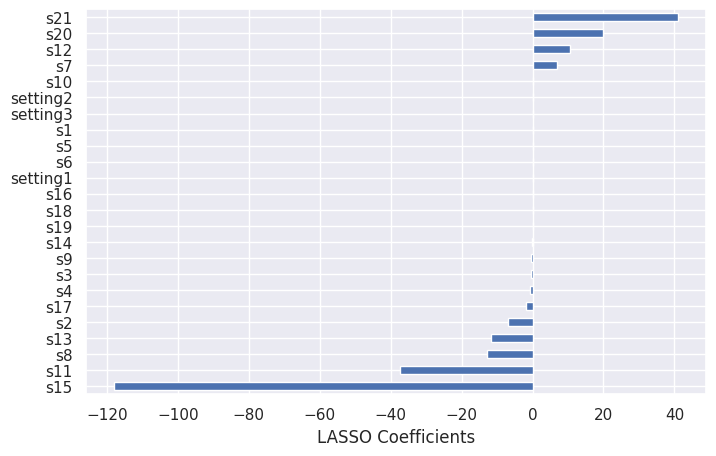

In [104]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

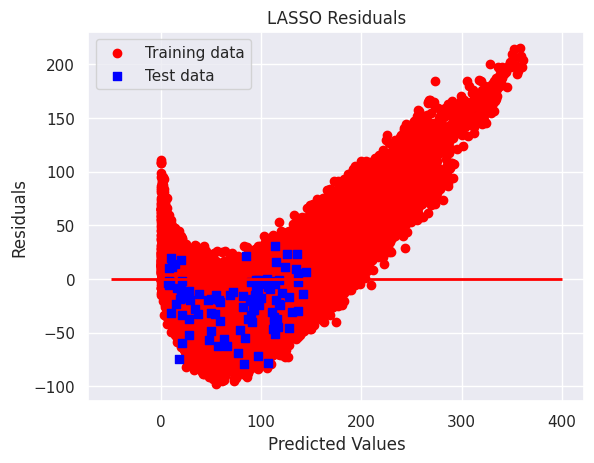

In [105]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [106]:
#Ridge

rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.408


Ridge Regression
Root Mean Squared Error         31.965740
Mean Absolute Error             25.544620
R^2                              0.408289
Explained Variance               0.667607

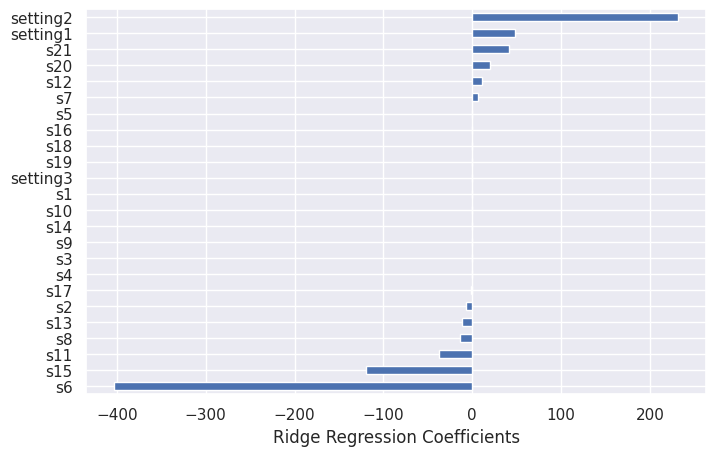

In [107]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

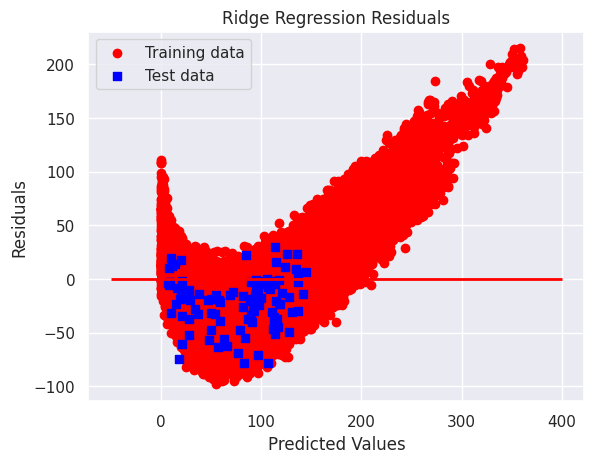

In [108]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [109]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.627, R^2 test: 0.419


Polynomial Regression
Root Mean Squared Error              31.686950
Mean Absolute Error                  24.052813
R^2                                   0.418565
Explained Variance                    0.631222

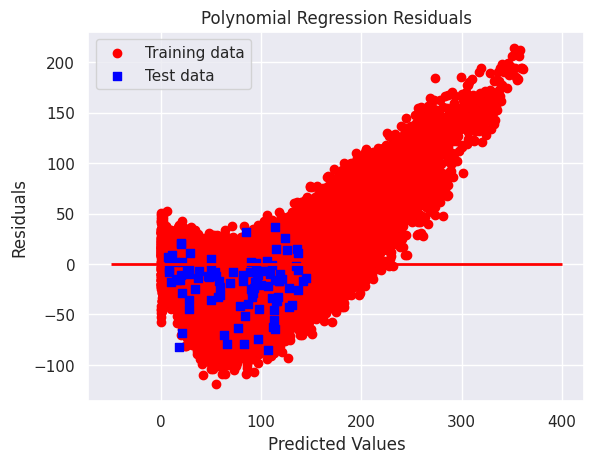

In [110]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

In [111]:
#Decision Tree regressor

#dtrg = DecisionTreeRegressor(max_depth=8, max_features=5, random_state=123) # selected features
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.625, R^2 test: 0.403


Decision Tree Regression
Root Mean Squared Error                 32.095349
Mean Absolute Error                     24.319068
R^2                                      0.403480
Explained Variance                       0.632767

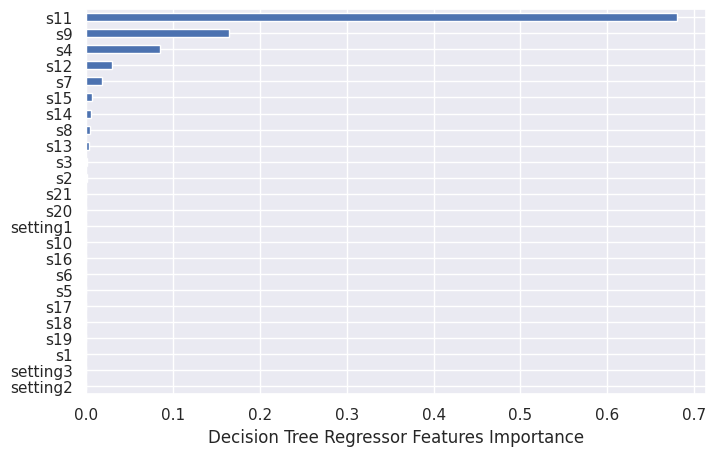

In [112]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )

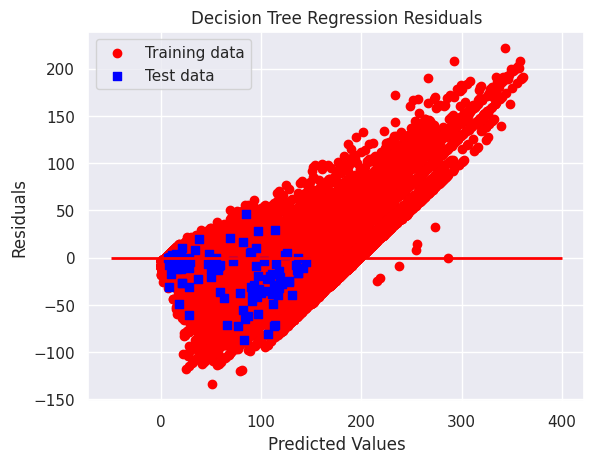

In [113]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

In [114]:
!pip install graphviz

We intend to enhance the learning process by restricting our focus to the selective features, effectively eliminating the redundant ones. The grid_scores_ function would be used for recursive feature elimination in the following steps. But, it has been deprecated by scikit-learn from version 1.2.2. Hence, we perform the following steps.

In [115]:
pip install scikit-learn==1.1.3


  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


Restart the runtime here and re-run all the code snippets for the functioning of RFE

Optimal number of features : 5
The selected features are: ['s4', 's7', 's9', 's11', 's12']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


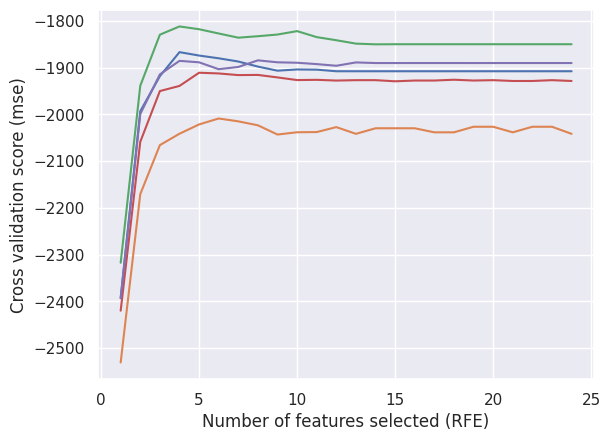

In [116]:
# Recursive feature elimination

kfold = model_selection.KFold(n_splits=5, random_state=10,shuffle=True)

dtrg = DecisionTreeRegressor(max_depth=7)

rfecv = RFECV(estimator=dtrg, step=1, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

sel_features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
print('The selected features are: {}'.format(sel_features))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected (RFE)")
plt.ylabel("Cross validation score (mse)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [117]:
# Decision Tree with selected features
X_train_trn = rfecv.transform(X_train)
X_test_trn = rfecv.transform(X_test)

print(X_train.shape)

dtrg = DecisionTreeRegressor(max_depth=7)

dtrg.fit(X_train_trn, y_train)

y_test_predict = dtrg.predict(X_test_trn)

dtrg_fs_metrics = get_regression_metrics('Decision Tree: Selected Features', y_test, y_test_predict)

#Combine decision tree results: All features and selected features
dtr_metrics = pd.concat([dtrg_fs_metrics,dtrg_metrics], axis=1)

dtr_metrics

(20631, 24)


Decision Tree: Selected Features  \
Root Mean Squared Error                         34.212392   
Mean Absolute Error                             25.866117   
R^2                                              0.322191   
Explained Variance                               0.593892   

                         Decision Tree Regression  
Root Mean Squared Error                 32.095349  
Mean Absolute Error                     24.319068  
R^2                                      0.403480  
Explained Variance                       0.632767

In [118]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(sel_features, dtrg.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

importances.sort_values(by='Importance', ascending=False)

Importance
s11    0.682967
s9     0.168858
s4     0.091236
s12    0.033993
s7     0.022947

In [119]:

#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.594, R^2 test: 0.525


Random Forest Regression
Root Mean Squared Error                 28.634253
Mean Absolute Error                     23.167130
R^2                                      0.525198
Explained Variance                       0.767320

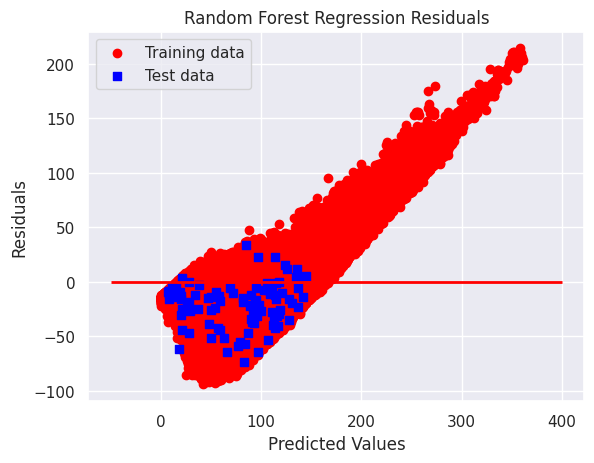

In [120]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

In [121]:
rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict
            }

rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

0           1          2          3          4   \
Actual      112.000000   98.000000  69.000000  82.000000   91.00000   
Prediction  151.578408  119.268513  74.415647  96.470907  112.59338   

                    5           6           7          8           9   ...  \
Actual       93.000000   91.000000   95.000000  111.00000   96.000000  ...   
Prediction  130.279445  128.114019  100.692144  116.11839  127.369752  ...   

                   90         91        92         93          94          95  \
Actual      38.000000  20.000000  85.00000  55.000000  128.000000  137.000000   
Prediction  40.976045  33.031218  51.39622  64.318328  143.657061  159.663783   

                    96          97          98        99  
Actual       82.000000   59.000000  117.000000  20.00000  
Prediction  100.027659  103.182456  157.063688  35.62655  

[2 rows x 100 columns]

In [122]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

Linear Regression      LASSO  Ridge Regression  \
Root Mean Squared Error          32.041095  31.966099         31.965740   
Mean Absolute Error              25.591780  25.551808         25.544620   
R^2                               0.405495   0.408275          0.408289   
Explained Variance                0.665297   0.668206          0.667607   

                         Decision Tree Regression  Polynomial Regression  \
Root Mean Squared Error                 32.095349              31.686950   
Mean Absolute Error                     24.319068              24.052813   
R^2                                      0.403480               0.418565   
Explained Variance                       0.632767               0.631222   

                         Random Forest Regression  
Root Mean Squared Error                 28.634253  
Mean Absolute Error                     23.167130  
R^2                                      0.525198  
Explained Variance                       0.767320

***Regression Summary:***

In accordance with our analysis in the data exploratory phase, non-linear regression models like Polynomial and Random Forest performed better than linear models such as the LASSO and Ridge regression. Random Forest clearly outperformed other models scoring RMSE of 28.63 cycles, i.e. the model predicts TTF within average error range of ±28.63 cycles.

The hyper-parameter tuning for the Random Forest Regressor, LASSO, and Ridge models was done manually, but ***Grid Search or Random Search with Cross Validation*** could be used for better processing.

In [123]:
# NN

from sklearn.neural_network import MLPRegressor
nregr = MLPRegressor(random_state=1,hidden_layer_sizes=(128,), max_iter=500)
nregr.fit(X_train, y_train)
y_test_predict = nregr.predict(X_test)
y_train_predict = nregr.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)),
      (metrics.r2_score(y_test, y_test_predict))))

nregr_metrics = get_regression_metrics('NN', y_test, y_test_predict)
nregr_metrics

R^2 training: 0.418, R^2 test: 0.550


NN
Root Mean Squared Error  27.869181
Mean Absolute Error      23.603773
R^2                       0.550232
Explained Variance        0.645595

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [125]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

Perform Grid-Search Hyperparameter tuning on a classifier.

In [126]:
def bin_classify(model, clf, features, params=None, score=None):

    """
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score

    Return:
        Tuned Clssifier object
        dataframe of model predictions and scores
    """


    X_train = df_train[features]

    X_test = df_test[features]

    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    if hasattr(grid_search, 'predict_proba'):
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred

    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)

    return grid_search.best_estimator_, df_predictions

Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.

In [127]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):

    """
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves

    Return:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold

    """

    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)

    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []
    for thr in thresh_roc:
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }

    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)

    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75

    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)

    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])

    df_roc_thresh['Model'] = model



    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []
    for thr in thresh_prc:
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')
        ax3.plot(thresh_roc, tpr, color='green',label='TPR')
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines')
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')
        ax4.plot(thresh_prc, recall, color='green',label='Recall')
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines')
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

Engines in the charts represent the queue or number of engines to be maintain per period, i.e. maintenance capacity.

In model names:

* B stands for applying the model on the original features set, Before feature extraction

* A stands for applying the model on the original + extracted features set, After feature extraction

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  for i, C in enumerate(Cs):



Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[75  0]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        75
           1       1.00      0.64      0.78        25

    accuracy                           0.91       100
   macro avg       0.95      0.82      0.86       100
weighted avg       0.92      0.91      0.90       100


Metrics:
           Logistic Regression B
Accuracy                0.910000
Precision               1.000000
Recall                  0.640000
F1 Score                0.780488
ROC AUC                 0.980267

ROC Thresholds:

      Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0  1.995180e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1  9.951803e-01   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2  6.019982e-01  1

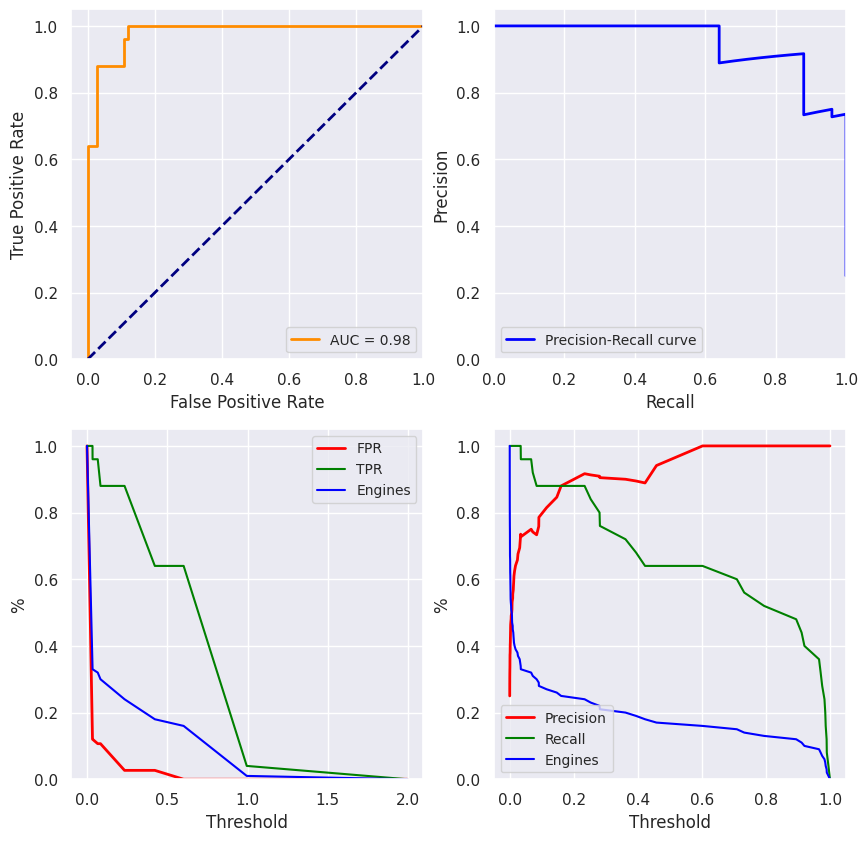

In [128]:
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  for i, C in enumerate(Cs):



Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

    accuracy                           0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
           Logistic Regression A
Accuracy                0.920000
Precision               1.000000
Recall                  0.680000
F1 Score                0.809524
ROC AUC                 0.981867

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.994083   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.994083   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.619432  17   8  7

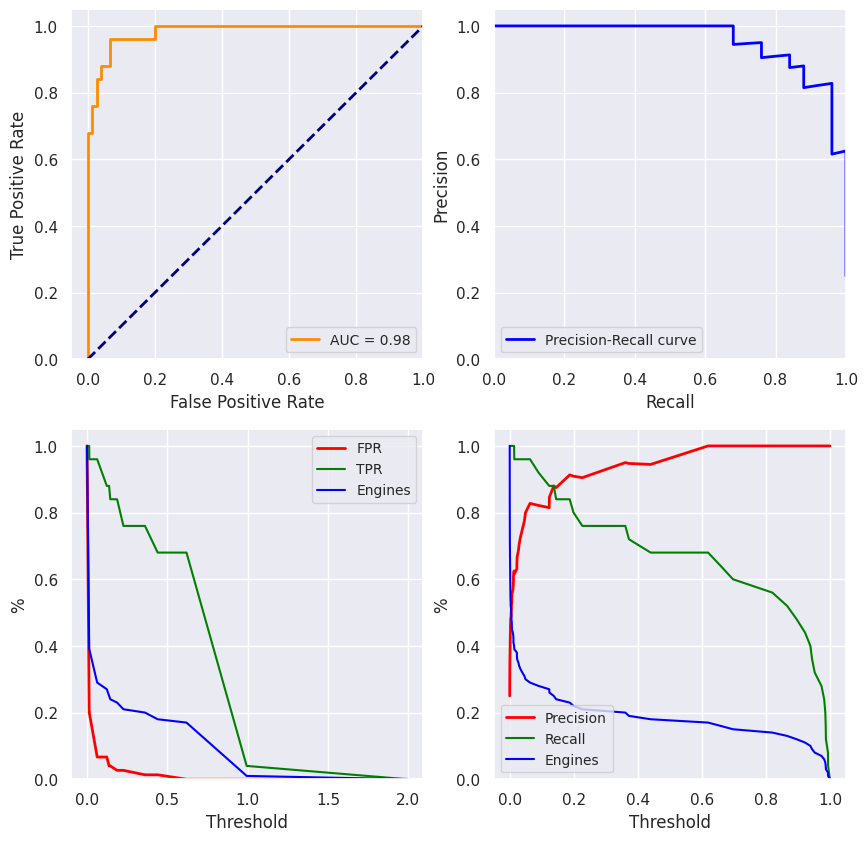

In [129]:
model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)

In [130]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

Logistic Regression B  Logistic Regression A
Accuracy                0.910000               0.920000
Precision               1.000000               1.000000
Recall                  0.640000               0.680000
F1 Score                0.780488               0.809524
ROC AUC                 0.980267               0.981867


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Decision Tree B
Accuracy          0.880000
Precision         0.933333
Recall            0.560000
F1 Score          0.700000
ROC AUC           0.945067

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   7  18  75   0  0.28  0.000000  1.000000  0.806452  0.07
2    0.938119   9  16  75   0  0.3

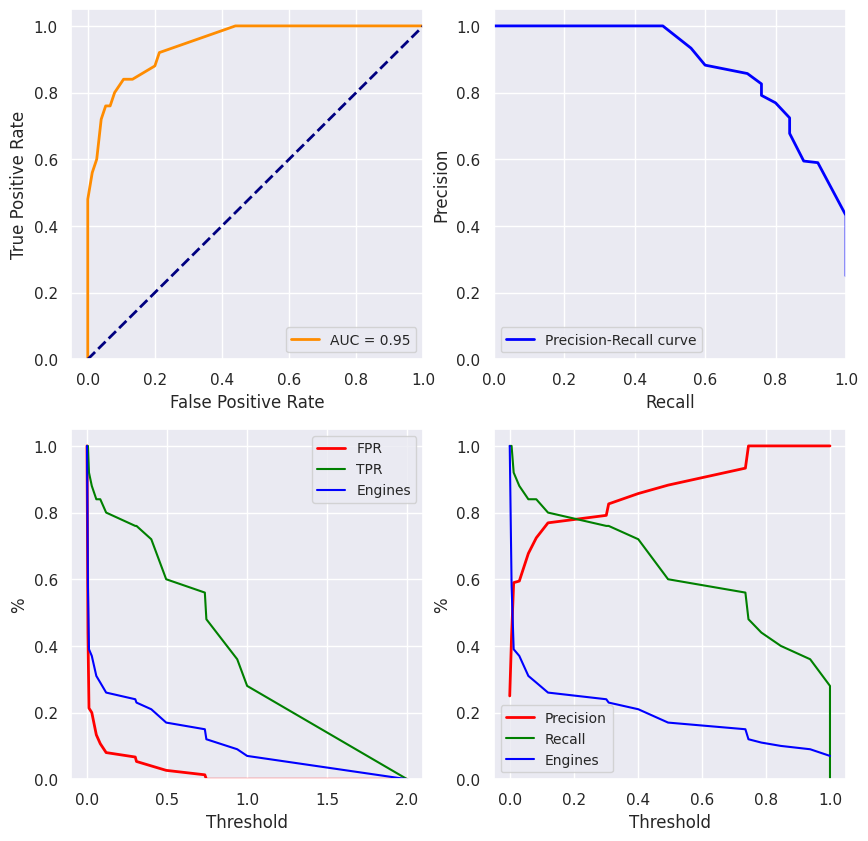

In [131]:
model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, pred_dtrb.y_score, print_out=True, plot_out=True)


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
-----------------------------------------------------------
Decision Tree A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           Decision Tree A
Accuracy          0.920000
Precision         0.947368
Recall            0.720000
F1 Score          0.818182
ROC AUC           0.962933

ROC Thresholds:

   Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
2   0.921053  11  14  75   0  0.44  0

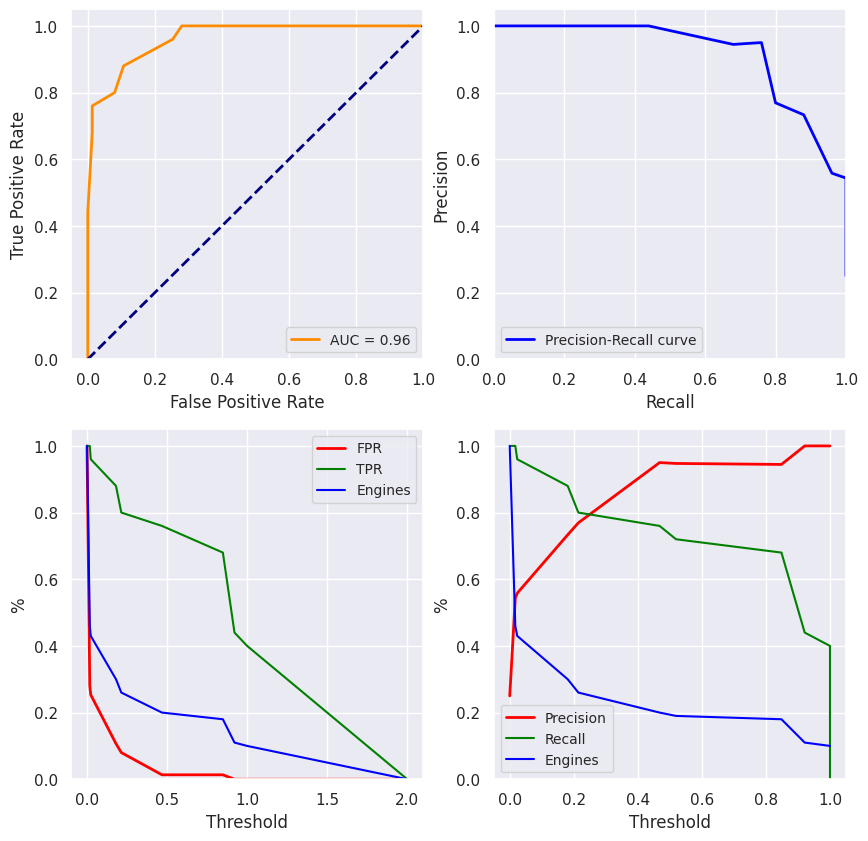

In [132]:
model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, pred_dtra = bin_classify(model, clf_dtra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, roc_dtra, prc_dtra = bin_class_metrics(model, y_test, pred_dtra.y_pred, pred_dtra.y_score, print_out=True, plot_out=True)

In [133]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr

Decision Tree B  Decision Tree A
Accuracy          0.880000         0.920000
Precision         0.933333         0.947368
Recall            0.560000         0.720000
F1 Score          0.700000         0.818182
ROC AUC           0.945067         0.962933


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest B
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.980267

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.997997   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.997997   1  24  75   0  0.04  0.000000  1.000000  0.757576 

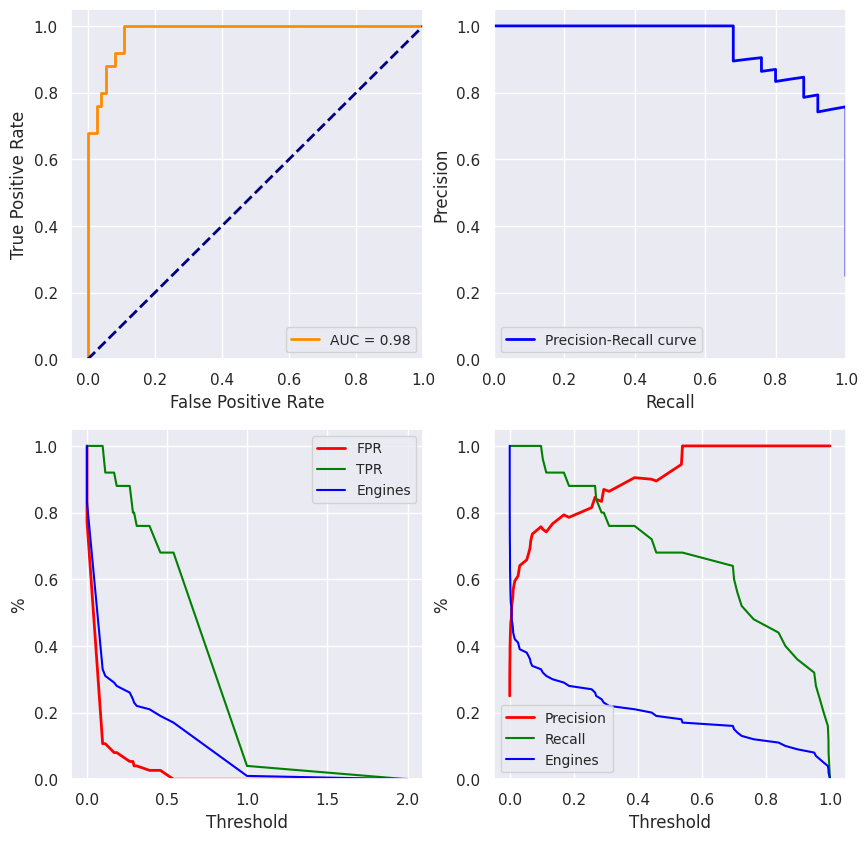

In [134]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest A
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.982400

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.999685   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.999685   1  24  75   0  0.04  0.000000  1.000000  0.757576 

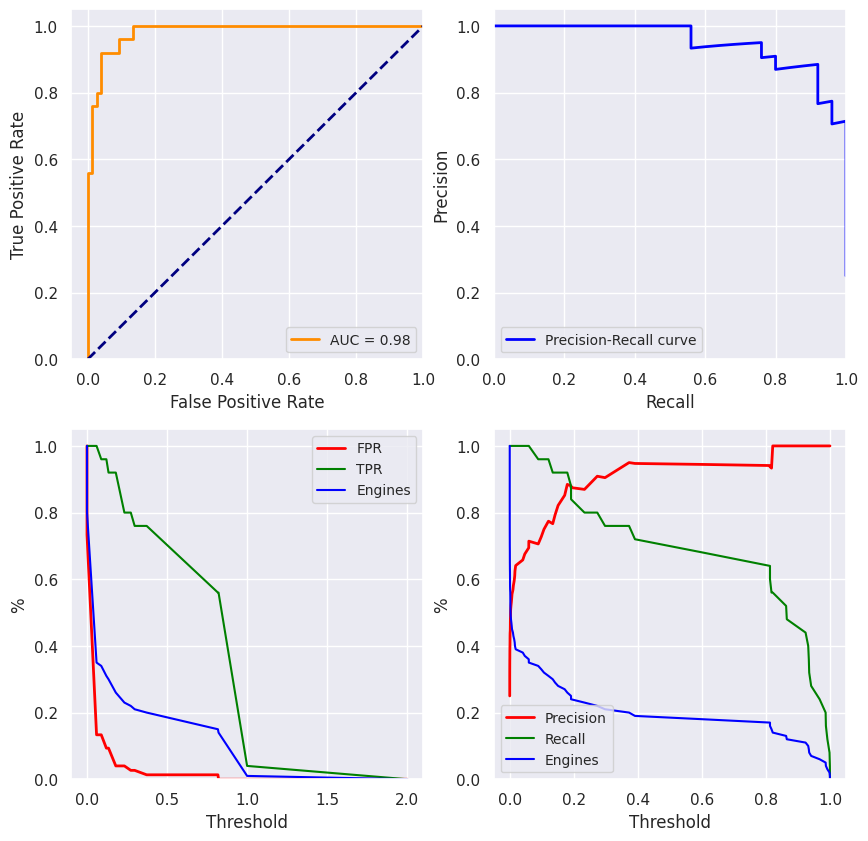

In [135]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [136]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

Random Forest B  Random Forest A
Accuracy          0.910000         0.910000
Precision         0.944444         0.944444
Recall            0.680000         0.680000
F1 Score          0.790698         0.790698
ROC AUC           0.980267         0.982400

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d5cfd0cab90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error



Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              KNN B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   5  20  75   0  0.20  0.000000  1.000000  0.789474  0.05
2    0.923077  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
3    0.846154  12  13  75   0  0.48  0.00

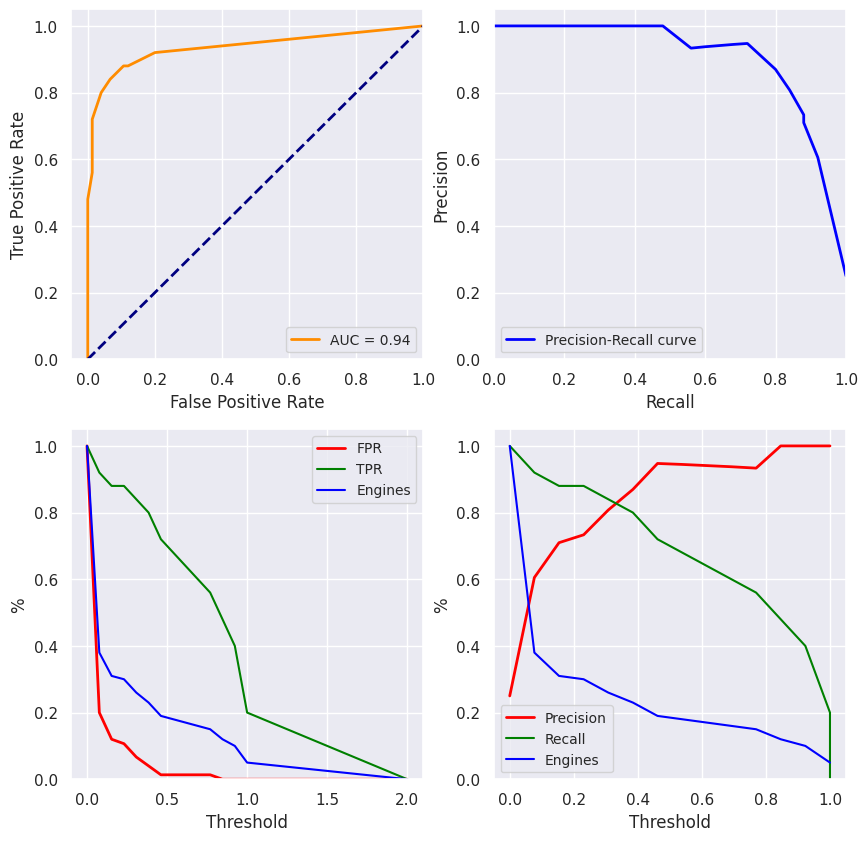

In [143]:
model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, pred_knnb.y_score, print_out=True, plot_out=True)


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              KNN A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.963467

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2    0.923077  12  13  75   0  0.48  0.000000  1.000000  0.852273  0.12
3    0.846154  14  10  75   0  0.56  0.00

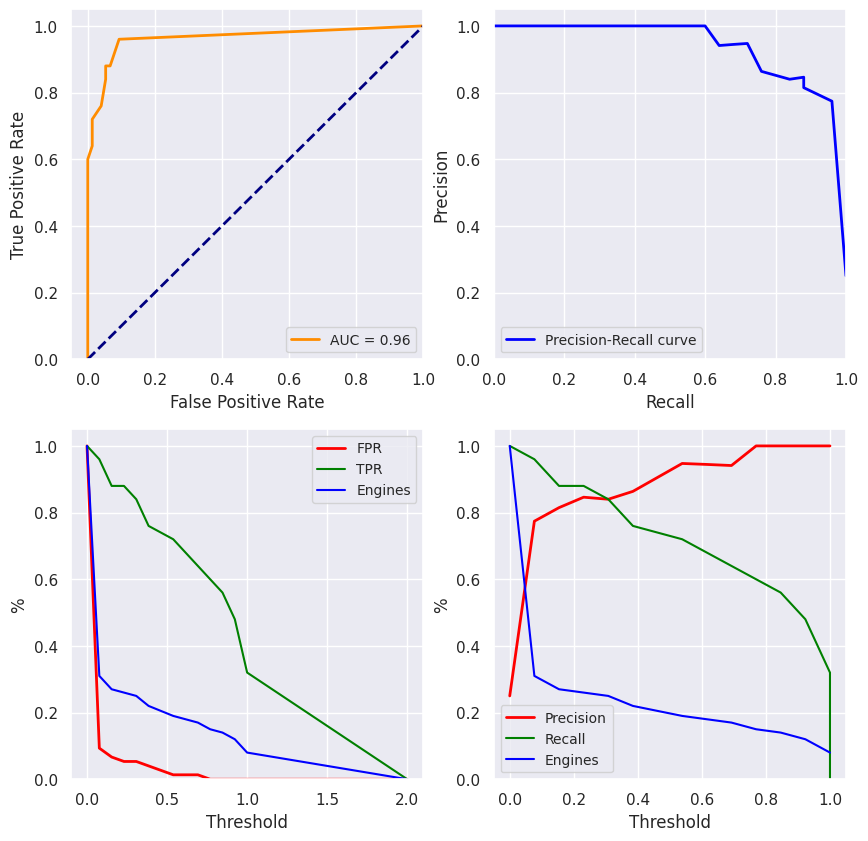

In [145]:
model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9 , 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knna, pred_knna = bin_classify(model, clf_knna, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knna)

metrics_knna, roc_knna, prc_knna = bin_class_metrics(model, y_test, pred_knna.y_pred, pred_knna.y_score, print_out=True, plot_out=True)

In [146]:
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn.sort_index()

KNN B     KNN A
Accuracy   0.910000  0.920000
F1 Score   0.790698  0.818182
Precision  0.944444  0.947368
ROC AUC    0.935200  0.963467
Recall     0.680000  0.720000


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3   1.000000e+00  17   8  

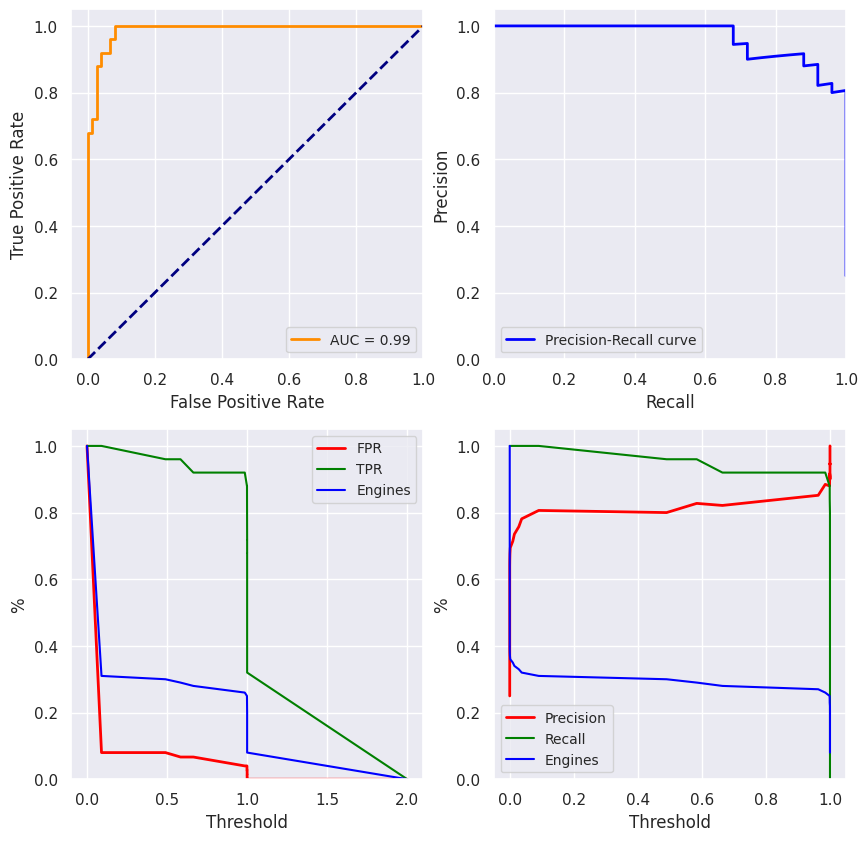

In [147]:
model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {}
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB A
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.980533

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
2   1.000000e+00  20   5  74   1  0.80  0.013333  0.986667  0.936709  0.21
3   9.999630e-01  20   5  

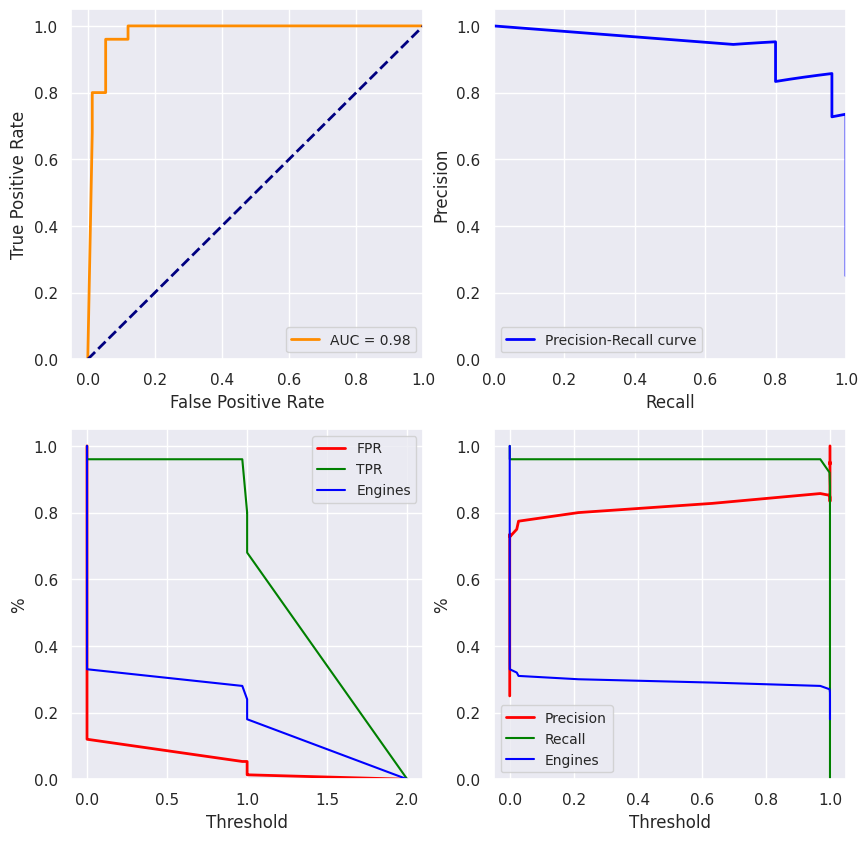

In [148]:
model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {}
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)

In [149]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

Gaussian NB B  Gaussian NB A
Accuracy        0.940000       0.940000
F1 Score        0.888889       0.888889
Precision       0.827586       0.827586
ROC AUC         0.987733       0.980533
Recall          0.960000       0.960000

In [150]:
#compare all models
metrics_bn = pd.concat([metrics_lgr, metrics_dtr, metrics_rfc, metrics_knn, metrics_gnb], axis=1)
metrics_bn

Logistic Regression B  Logistic Regression A  Decision Tree B  \
Accuracy                0.910000               0.920000         0.880000   
Precision               1.000000               1.000000         0.933333   
Recall                  0.640000               0.680000         0.560000   
F1 Score                0.780488               0.809524         0.700000   
ROC AUC                 0.980267               0.981867         0.945067   

           Decision Tree A  Random Forest B  Random Forest A     KNN B  \
Accuracy          0.920000         0.910000         0.910000  0.910000   
Precision         0.947368         0.944444         0.944444  0.944444   
Recall            0.720000         0.680000         0.680000  0.680000   
F1 Score          0.818182         0.790698         0.790698  0.790698   
ROC AUC           0.962933         0.980267         0.982400  0.935200   

              KNN A  Gaussian NB B  Gaussian NB A  
Accuracy   0.920000       0.940000       0.940000  
Precision  0.947368       0.827586       0.827586  
Recall     0.720000       0.960000       0.960000  
F1 Score   0.818182       0.888889       0.888889  
ROC AUC    0.963467       0.987733       0.980533

Naive Bayes and Random Forest have scored the best AUC ROC. It is also noticed that feature-extraction has improved most models performance metrics (Verification).

***Binary Classification Summary:***

* Most of the binary classifiers showed better performance metrics with the addition of new features.
* Random Forest and Naive Bayes showed same performance before and after feature engineering.